# Visualization in Python

In this project, we'll work through munging a data set and creating visualizations related to trends in the airline industry in the middle of the last century. You'll get started using [MatPlotLib](https://matplotlib.org/), a very powerful and popular plotting library in Python that is covered in this week's course materials.

In [0]:
# Install the pydataset package. This package gives us data sets to work with very easily
! pip install pydataset

     |████████████████████████████████| 15.9MB 2.5MB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-cp36-none-any.whl size=15939430 sha256=d022bfa118bd0ac033733db2efbfe9bee041cc95ebe7adc1660959d294eb45c6
  Stored in directory: /root/.cache/pip/wheels/fe/3f/dc/5d02ccc767317191b12d042dd920fcf3432fab74bc7978598b
Successfully built pydataset


In [0]:
# The convention for importing matplotlib with an alias is "plt". We'll also need pandas and numpy

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## The Air Passengers Dataset

This dataset shows the number of passengers flying United States airlines by month from 1949-1960. Your job is to do various data munging operations on this dataset to clean it up and prepare it for several visualizations. You will then determine what code is needed to generate those visualizations.

In [0]:
from pydataset import data

passengers = data('AirPassengers')

Ugh. When we examine the head of this datset, we can see that the years are in decimal form rather than month and year.

NOTE: The times are represented by twelfths. i.e. 1949.00000 = 149 0/12 (January). 1949.083333 = 1949 1/12 (February), and so on.

In [0]:
passengers.head(12)

,time,AirPassengers
1,1949.000000,112
2,1949.083333,118
3,1949.166667,132
4,1949.250000,129
5,1949.333333,121
6,1949.416667,135
7,1949.500000,148
8,1949.583333,148
9,1949.666667,136
10,1949.750000,119


## The decimal years complicate the EDA work

We need to deal with this by making explicit month and year columns. It is common to have to reformat columns like this in a dataframe

## #1 Add a 'year' column to passengers that reflects the current year

In [0]:
from math import floor
from math import trunc
years, year_fraction = divmod(passengers.time, 1)
passengers['year']= years.apply(lambda x: floor(x))
passengers.head()

,time,AirPassengers,year
1,1949.000000,112,1949
2,1949.083333,118,1949
3,1949.166667,132,1949
4,1949.250000,129,1949
5,1949.333333,121,1949


## #2 Add a "month" column

Set this up in such a way that January is represented with a 1, February with a 2, etc.

In [0]:
months = round(year_fraction * 12)
passengers['months'] = months.apply(lambda x: floor(x) + 1) #plus 1 to adjust to correct month
passengers.head()


,time,AirPassengers,year,months
1,1949.000000,112,1949,1
2,1949.083333,118,1949,2
3,1949.166667,132,1949,3
4,1949.250000,129,1949,4
5,1949.333333,121,1949,5


## #3 Generate the plot below of passengers vs. time using each monthly count

<a href='https://drive.google.com/file/d/1PdaXbkCVzUXBnUP6c6cLP3nZ94ShSLg1/view?usp=embed_facebook&source=ctrlq.org'><img src='https://lh4.googleusercontent.com/7EHckqyjefS7rN8-gAtj2SgSyKfV3wlTnGKqCwzOf85F6NYlqYQbz7bDfWw=w2400' /></a>

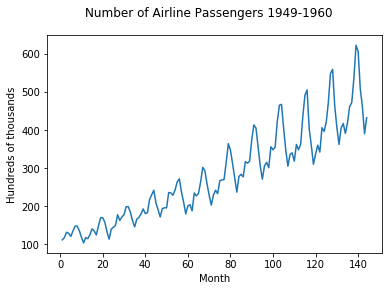

In [0]:
plt.plot(passengers['AirPassengers'])
plt.ylabel('Hundreds of thousands')
plt.xlabel('Month')
plt.suptitle('Number of Airline Passengers 1949-1960')
plt.show()

## #4 Generate the plot below of passengers vs. time using an annual count

<a href='https://drive.google.com/file/d/19WYHQR7sFgaeN5ZHlwx5x1-o-wxJ4weW/view?usp=sharing&amp;usp=embed_facebook&source=ctrlq.org'><img src='https://lh4.googleusercontent.com/2gbHNgm8UhbCEevaUBpMUSvVgk_6QuxMASqn9-wK1NdzrDXrcF-VIWK_o08=w2400' /></a>

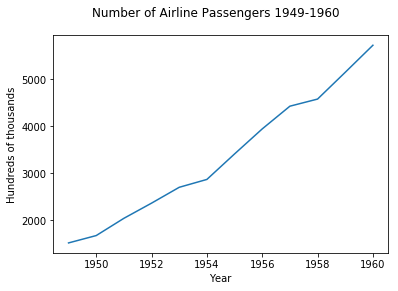

In [0]:
byYear = passengers.groupby('year').sum()[['AirPassengers']]
plt.plot(byYear['AirPassengers'])
plt.ylabel('Hundreds of thousands')
plt.xlabel('Year')
plt.suptitle('Number of Airline Passengers 1949-1960')
plt.show()

## #5 Generate the barplot below of passengers by year

<a href='https://drive.google.com/file/d/1-4NF40zvVhwi6RWagJu98BaBuDNOXaEd/view?usp=sharing&amp;usp=embed_facebook&source=ctrlq.org'><img src='https://lh6.googleusercontent.com/IQRk35KApDIxYtHGH3WoczLnCvHCRdMNlHw64rgLWPYUostOoAn2hxp8lZA=w2400' /></a>

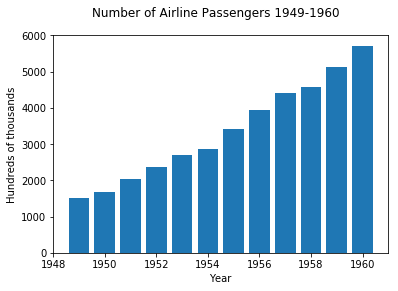

In [0]:
plt.bar(x = byYear.index, height = byYear['AirPassengers'])
plt.ylabel('Hundreds of thousands')
plt.xlabel('Year')
plt.suptitle('Number of Airline Passengers 1949-1960')
plt.show()

## #6 Generate the histogram below of monthly passengers

**Additional requirements:**

* Only include 1955 and beyond
* Use a binwidth of 50, a min of 200, and a max of 700
* Set the yticks to start at 0, end at 25 by interval of 5

<a href='https://drive.google.com/file/d/1mEtvUbnh2LcDDc73LNr_qX984HzgyhiQ/view?usp=sharing&amp;usp=embed_facebook&source=ctrlq.org'><img src='https://lh6.googleusercontent.com/7I2FzRPSQPyoalFcwH3vTDeB9Gf80OUlaZOs1x9oRRYyQLlHXPU9H-NhSVQ=w2400' /></a>

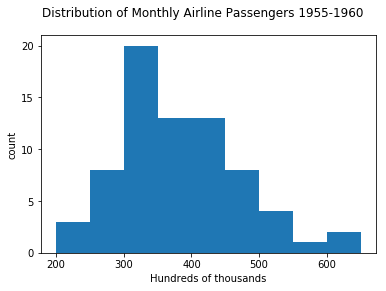

In [0]:
plt.hist(passengers['AirPassengers'][passengers['year']>1954], bins=np.arange(200, 700, 50)) 
plt.xlabel('Hundreds of thousands')
plt.ylabel('count')
plt.yticks(np.arange(0, 25, 5))
plt.suptitle('Distribution of Monthly Airline Passengers 1955-1960')
plt.show()

## #7 Generate the histogram below of monthly passengers

**Additional requirements:**

* Generate two groups to compare. Group 1 should be the years 1949-1950. Group 2 should be the years 1959-60.
* Binwidth of 50 from 100 to 700
* yticks from 0 to 24, spaced by 2
* Be sure to include a legend

<a href='https://drive.google.com/file/d/1gqJbBVOPIurYikUIDpXoAF3gZx2p8lUA/view?usp=sharing&amp;usp=embed_facebook&source=ctrlq.org'><img src='https://lh3.googleusercontent.com/Ok91nFY8Srjn1FpVwOil9ycH9y6isZejTqi7hifqaEA5E3tWpkwldWVLo3U=w2400' /></a>

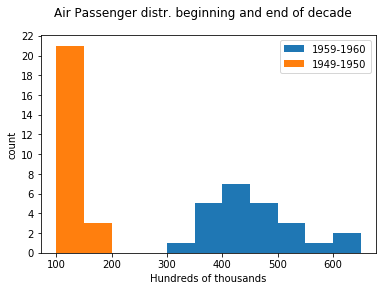

In [0]:
x = passengers['AirPassengers'][passengers['year']>1958]
y = passengers['AirPassengers'][passengers['year']<1951]

plt.hist(x, bins=np.arange(100, 700, 50), label = '1959-1960') 
plt.hist(y, bins=np.arange(100, 700, 50), label = '1949-1950') 
plt.xlabel('Hundreds of thousands')
plt.ylabel('count')
plt.legend(loc='upper right')
plt.yticks(np.arange(0, 24, 2))
plt.suptitle('Air Passenger distr. beginning and end of decade')
plt.show()

## #8 Generate the time plot below

**Additional requirements:**

* Compare 1950, 1955, and 1960 by month

<a href='https://drive.google.com/file/d/11nVH5EiYxxtJ48isS9VLtwLIjn0hALXV/view?usp=sharing&amp;usp=embed_facebook&source=ctrlq.org'><img src='https://lh3.googleusercontent.com/SKfWqBE324A__VS8V-TBqMQXHWE9OUjVoJyeyJME8uJzyfWS73aaCms7A3c=w2400' /></a>

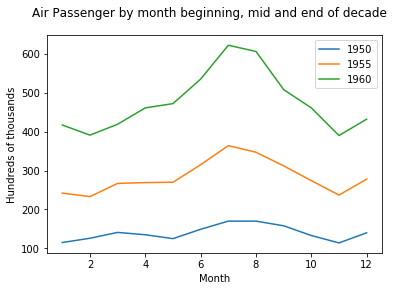

In [0]:
a = passengers[passengers['year'] == 1950]
b = passengers[passengers['year'] == 1955]
c = passengers[passengers['year'] == 1960]
plt.plot(a['months'], a['AirPassengers'],  label = '1950')
plt.plot(b['months'], b['AirPassengers'],  label = '1955')
plt.plot(c['months'], c['AirPassengers'],  label = '1960')

plt.ylabel('Hundreds of thousands')
plt.xlabel('Month')
plt.legend(loc='upper right')
plt.suptitle('Air Passenger by month beginning, mid and end of decade')
plt.show()

## #9 Tell a story

* If you could only use one of these plots to tell a story about air travel trends mid-centry, which would you use and why?


In [0]:
print('I would use the plot from #3 because it shows how airpassenger growth has increased from the beginning through the end of the decade, but also showing how seasonality trends are similar but more drastic the further through the decade. Bottom line, air travel increased drastically throughout the decade with more severe seasonality trends in the summer months.' )

I would use the plot from #3 because it shows how airpassenger growth has increased from the beginning through the end of the decade, but also showing how seasonality trends are similar but more drastic the further through the decade. Bottom line, air travel increased drastically throughout the decade with more severe seasonality trends in the summer months.
